<h1> Sales (2016) </h1>

In [34]:
from __future__ import division
import pandas as pd
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 22})
import dateutil

Populating the interactive namespace from numpy and matplotlib


In [138]:
DF=pd.read_csv('/Users/attiladobi/Downloads/Customer_Summary2016.csv',skiprows=2)
#DF['Time']=pd.to_datetime(DF['Time Sent'])
DF['Date']=pd.to_datetime(DF['aDate'])
DF['day'] = DF['Date'].dt.day
DF['month'] = DF['Date'].dt.month
DF['year'] = DF['Date'].dt.year

DF['Value']=[double(val.strip('$')) for val in DF['aTip']] #best reference for price
DF['Cost']=[double(val.strip('$')) if val is not nan else 0 for val in DF['ProductCost']]

In [105]:
DF.columns

Index([u'aDate', u'aCustomerFname', u'aCustomerLname', u'EmployeeFirstName',
       u'EmployeeLastName', u'TreatmentName', u'ProductName',
       u'Asterisk_Services', u'Asterisk_Refreshments', u'Asterisk_Green_Fee',
       u'Asterisk_Unspecified', u'TreatmentCost', u'ProductCost', u'Tip',
       u'aTax', u'aTip', u'aPaymentType', u'aHeardAboutUs', u'TreatmentCost_1',
       u'ProductCost_1', u'Tip_1', u'TotalTaxes', u'textbox11', u'Date',
       u'month', u'year', u'Value'],
      dtype='object')

<h1> Plot monthly revenue </h1>

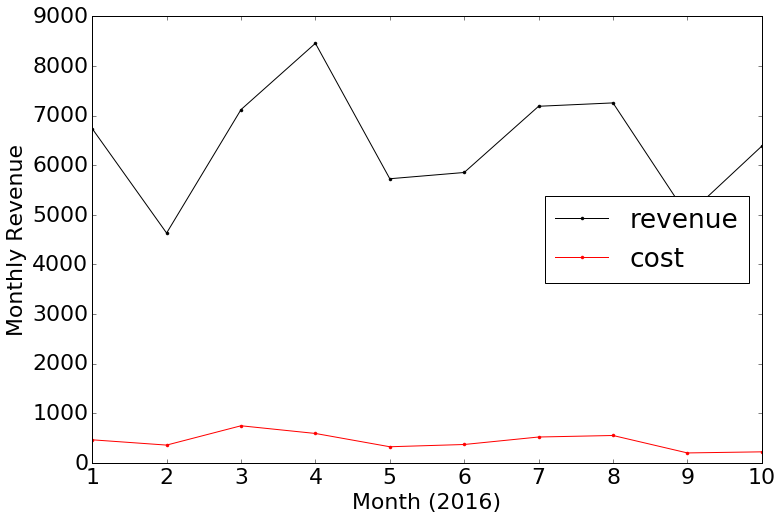

In [176]:
plt.plot(DF.groupby('month').sum()['Value'],'.-k',label='revenue')
plt.plot(DF.groupby('month').sum()['Cost'],'.-r',label='cost')
ylabel('Monthly Revenue')
xlabel('Month (2016)')
legend(loc='right', numpoints=1)

In [181]:
DF.groupby(['year'])['aCustomerLname'].nunique()

year
2016    128
Name: aCustomerLname, dtype: int64

<h1> count the number of unique customers per month </h1>

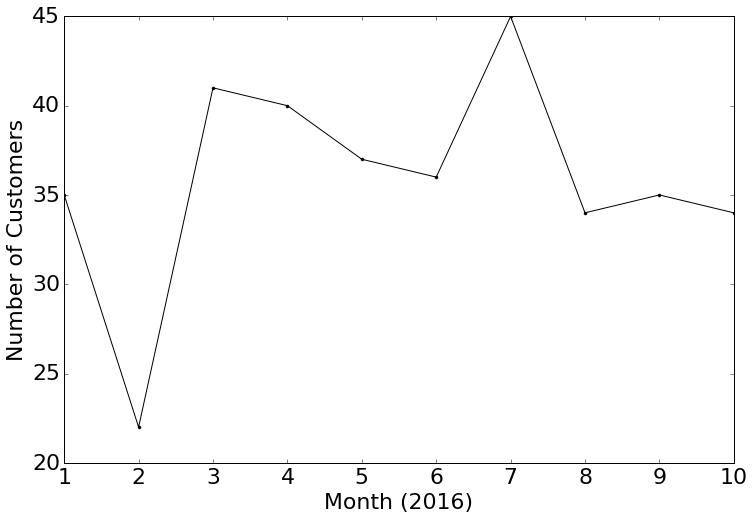

In [179]:
plt.plot(DF.groupby(['month'])['aCustomerLname'].nunique(),'.-k')
ylabel('Number of Customers')
xlabel('Month (2016)')
#legend(loc='right', numpoints=1)